# Iterative Policy Evaluation

To test the performance of the iterative policy evaluation algorithm, we consider the Frozen Lake environment in OpenAI Gym. 

This environment consists of 16 fields (4 by 4 grid). These fields are enumerated in the Figure below.
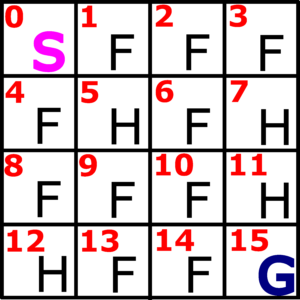

There are four types of fields: start field (S), frozen fields (F), holes (H), and the goal field (G). The goal of the game is to reach the goal field G, starting from the start field S and by avoiding the hole fields. If the player steps on the frozen field, the player ends the game. That is, the game is completed if we step on a hole field or if we reach the goal field. A state or an observation is the current field. The states are denoted from 0 to 15.

We receive the reward of 0 if we step on the frozen or hole fields. On the other hand, we receive the reward of 1, if we step on the goal field. In any internal state (not close to the boundary) that is not a terminal state, we have 4 possible actions: UP, DOWN, LEFT, and RIGHT.

# Value Function

Definition of the value function: The value function of a particular state s under the policy, denoted by pi, is the expectation of the return Gt obtained by following the policy and starting from the state s: 

here E_{pi}[.] denotes the expected value of the random variable G_{t} obtained under the assumption that the agent follows the policy . The value function of the terminal state is defined to be zero. Also, the value function v_{pi}(s) is often called the state-value function for the policy.

Let us consider again the Frozen lake example. To every field, that is, to every state s1,s2,...., s16, we can associate the value function. This is shown in Fig. below.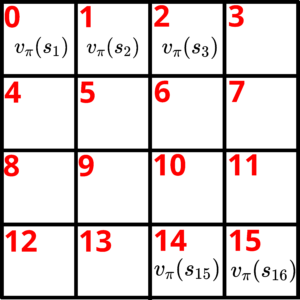

Bellman equation for the state value function v_{pi}(s): Let s' be the state at the time instant t+1, and s be the state at the time instant s. Then, it can be shown that 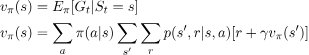

Where

r is the particular value of the reward obtained by reaching s' and v_{pi}(s') is the state value function at s'.

a is the action performed in the state s

pi(a|s) is the (control) policy, that is, the probability of selecting action a when in the state s

p(s',r|s,a) is the dynamics of the Markov decision process: 

# Iterative Policy Evaluation Algorithm

The goal is to compute the value function v_{pi}(s) for every state expressed by using the Bellman equation 
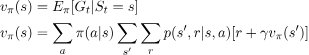

Assuming that we have N states s, and by writing the Bellman equation for every state, we can obtain a system of linear equations where the unknowns are the states. By solving this system, we can compute the state value functions for every state. An alternative approach for computing the value functions is to use an iterative method. 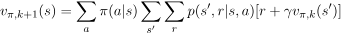

where k is the iteration index, and v_{pi,k+1}(s) is the value function computed at the iteration k+1 and v_{pi,k}(s') is the value function computed at the iteration k.

Let vk, be the vector whose entries are value functions for the corresponding states. That is,

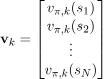

where vpi,k(s_i) is the value function at the state s_{i} computed at the iteration k. Then, we can stop the iteration when max(|vk+1 - vk|) <= delta, where |.| is an absolute value, and delta is the convergence tolerance (a relatively small number).

# Python Implementation of the Iterative Policy Evaluation Algorithm

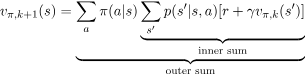

The first step is to import the necessary libraries and to import the Frozen Lake environment:

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
  
env=gym.make("FrozenLake-v1", render_mode="human")
env.reset()
# render the environment
env.render()
env.close()

We can render the environment by calling env.render(). However, we do not need a graphical representation of the environment in this post. Consequently, we closed the graphical representation by typing: env.close().

We can inspect the observation space, action space, and transition probabilities by using these code lines

In [3]:
# observation space - states 
env.observation_space
 
# actions: left -0, down - 1, right - 2, up- 3
env.action_space
 
 
#transition probabilities
#p(s'|s,a) probability of going to state s' 
#          starting from the state s and by applying the action a
 
# env.P[state][action]
env.unwrapped.P[0][1] #state 0, action 1
# output is a list having the following entries
# (transition probability, next state, reward, Is terminal state?)


[(0.33333333333333337, 0, 0, False),
 (0.3333333333333333, 4, 0, False),
 (0.33333333333333337, 1, 0, False)]

The iterative policy evaluation is implemented as follows

In [7]:
# select the discount factor
discountFactor=0.9
# initialize the value function vector
valueFunctionVector=np.zeros(env.observation_space.n)
# maximum number of iterations
maxNumberOfIterations=1000
# convergence tolerance delta
convergenceTolerance=10**(-6)
 
# convergence list 
convergenceTrack=[]
 
for iterations in range(maxNumberOfIterations):
    convergenceTrack.append(np.linalg.norm(valueFunctionVector,2))
    valueFunctionVectorNextIteration=np.zeros(env.observation_space.n)
    for state in env.unwrapped.P:
        outerSum=0
        for action in env.unwrapped.P[state]:
            innerSum=0
            for probability, nextState, reward, isTerminalState in env.unwrapped.P[state][action]:
                #print(probability, nextState, reward, isTerminalState)
                innerSum=innerSum+ probability*(reward+discountFactor*valueFunctionVector[nextState])
            outerSum=outerSum+0.25*innerSum
        valueFunctionVectorNextIteration[state]=outerSum
    if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
        valueFunctionVector=valueFunctionVectorNextIteration
        print('Converged!')
        break
    valueFunctionVector=valueFunctionVectorNextIteration
    print (valueFunctionVector)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.  ]
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.05625 0.      0.      0.05625 0.30625 0.     ]
[0.         0.         0.         0.         0.         0.
 0.01265625 0.         0.         0.0253125  0.06890625 0.
 0.         0.0815625  0.34421875 0.        ]
[0.         0.         0.00284766 0.         0.         0.
 0.01550391 0.         0.00569531 0.03385547 0.08599219 0.
 0.         0.10149609 0.36130469 0.        ]
[0.         0.00064072 0.0041291  0.00064072 0.00128145 0.
 0.01998896 0.         0.00889893 0.04346631 0.09239941 0.
 0.         0.11174766 0.37347842 0.        ]
[0.00043249 0.00107321 0.00571489 0.00121737 0.00229058 0.
 0.02171892 0.         0.0120705  0.04793535 0.09831008 0.
 0.         0.11895579 0.37996573 0.        ]
[0.00095147 0.00162463 0.00668799 0.00183367 0.00332855 0.
 0.02340562 0.         0.0140167  0.05160068 0.1011645  0.
 0.         0.12304

This implementation closely follows. We have 3 for loops. The first loop iterates through all the states. The second for loop is the outer loop. The third loop is the inner loop in the same equations. The vector is implemented as valueFunctionVector.

We stop the iteration if the previously explained convergence criterion is satisfied. For visualization purposes, we track the two norm of the vector by using the list convergenceTrack.

We plot the results by using these code lines:

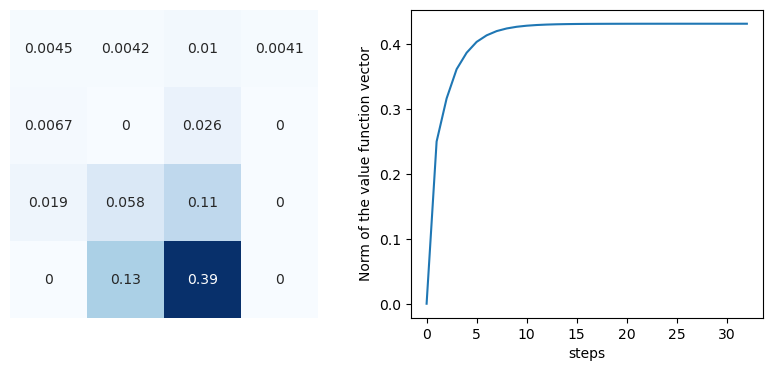

In [11]:
# visualize the state values
def grid_print(valueFunction,reshapeDim):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    ax = sns.heatmap(valueFunction.reshape(4,4),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)
    plt.savefig('valueFunctionGrid.png',dpi=600)
    
grid_print(valueFunctionVector,4)

plt.subplot(1, 2, 2)
plt.plot(convergenceTrack)
plt.xlabel('steps')
plt.ylabel('Norm of the value function vector')
plt.savefig('convergence.png',dpi=600)
plt.show()

The number in every field represents the computed value function. We can observe that in the terminal states, the function values are zero. Furthermore, we can observe that the function values decrease as we are further away from the goal state. The figure below shows the convergence of the algorithm.

# POLICY ITERATION ALGORITHM:

Perform these two steps iteratively until convergence of the computed policy pik

1- Policy evaluation: For the policy pik compute the state-value function v_pik(s) by using the iterative policy evaluation algorithm for every state s.

2-Policy improvement: For the computed state-value function v_pik(s), for every state s, compute the action to be taken in state s by solving

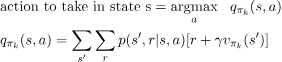

As mentioned previously this algorithm can be initialized with a complete random policy or with a policy obtained on the basis of some a priori knowledge about the environment.

The first step is to define two functions. The first function will be used to implement the step 1 of the policy iteration algorithm. That is, this function will evaluate the policy or better to say, this function will compute the state-value function for a given policy. This function is actually developed it before, and here for brevity, we will not explain this function again. We will only briefly explain its inputs and outputs, and the general purpose. The function is given below.

In [17]:
##################
# this function computes the state value function by using the iterative policy evaluation algorithm
##################
# inputs: 
##################
# env - environment 
# valueFunctionVector - initial state value function vector
# policy - policy to be evaluated - this is a matrix with the dimensions (number of states)x(number of actions)
#        - p,q entry of this matrix is the probability of selection action q in state p
# discountRate - discount rate 
# maxNumberOfIterations - max number of iterations of the iterative policy evaluation algorithm
# convergenceTolerance - convergence tolerance of the iterative policy evaluation algorithm
##################
# outputs:
##################
# valueFunctionVector - final value of the state value function vector 
 
##################
def evaluatePolicy(env,valueFunctionVector,policy,discountRate,maxNumberOfIterations,convergenceTolerance):
    import numpy as np
    convergenceTrack=[]
    for iterations in range(maxNumberOfIterations):
        convergenceTrack.append(np.linalg.norm(valueFunctionVector,2))
        valueFunctionVectorNextIteration=np.zeros(env.observation_space.n)
        for state in env.unwrapped.P:
            outerSum=0
            for action in env.unwrapped.P[state]:
                innerSum=0
                for probability, nextState, reward, isTerminalState in env.unwrapped.P[state][action]:
                    #print(probability, nextState, reward, isTerminalState)
                    innerSum=innerSum+ probability*(reward+discountRate*valueFunctionVector[nextState])
                outerSum=outerSum+policy[state,action]*innerSum
            valueFunctionVectorNextIteration[state]=outerSum
        if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
            valueFunctionVector=valueFunctionVectorNextIteration
            print('Iterative policy evaluation algorithm converged!')
            break
        valueFunctionVector=valueFunctionVectorNextIteration       
    return valueFunctionVector

The first argument of this function, called “env” is the OpenAI Gym Frozen Lake environment. The second argument, called “valueFunctionVector” is the value function vector. It represents an initial value of the state-value function vector. This vector is iteratively updated by this function, and its value is returned. For the Frozen Lake environment, this vector has the following form

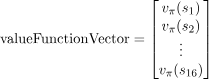

The third argument, denoted by “policy” is a matrix defining the policy that needs to be evaluated. This matrix has this form

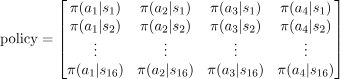

The second function implements the step 2 of the policy iteration algorithm. That is, this function is used to improve the policy. The function is given below.

In [20]:
##################
# this function computes an improved policy 
##################
# inputs: 
# env - environment 
# valueFunctionVector - state value function vector that is previously computed
# numberActions - number of actions 
# numberStates - number of states 
# discountRate - discount rate
 
# outputs:
# improvedPolicy - improved policy
# qvaluesMatrix  - matrix containing computed action-value functions 
#                - (p,q) entry of this matrix is the action value function computed at the state p and for the action q
# Note: qvaluesMatrix is just used for double check - it is actually not used lated on    
     
     
##################
 
def improvePolicy(env,valueFunctionVector,numberActions,numberStates,discountRate):
    import numpy as np
    # this matrix will store the q-values (action value functions) for every state
    # this matrix is returned by the function 
    qvaluesMatrix=np.zeros((numberStates,numberActions))
    # this is the improved policy
    # this matrix is returned by the function
    improvedPolicy=np.zeros((numberStates,numberActions))
     
    for stateIndex in range(numberStates):
        # computes a row of the qvaluesMatrix[stateIndex,:] for fixed stateIndex, 
        # this loop iterates over the actions
        for actionIndex in range(numberActions):
            # computes the Bellman equation for the action value function
            for probability, nextState, reward, isTerminalState in env.unwrapped.P[stateIndex][actionIndex]:
                qvaluesMatrix[stateIndex,actionIndex]=qvaluesMatrix[stateIndex,actionIndex]+probability*(reward+discountRate*valueFunctionVector[nextState])
             
        # find the action indices that produce the highest values of action value functions
        bestActionIndex=np.where(qvaluesMatrix[stateIndex,:]==np.max(qvaluesMatrix[stateIndex,:]))
 
        # form the improved policy        
        improvedPolicy[stateIndex,bestActionIndex]=1/np.size(bestActionIndex)
    return improvedPolicy,qvaluesMatrix

The second output argument, called “qvaluesMatrix” has the following form

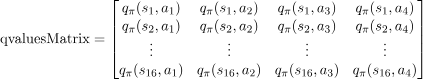

In [21]:
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
# create the environment 
# this is a completely deterministic environment
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode="human")
# this is a completely stochastic environment - the algorithm will not work properly since the transition probabilities are equal -too much!
#env=gym.make("FrozenLake-v1", render_mode="human") 
env.reset()
# render the environment
# uncomment this if you want to render the environment
env.render()
#
env.close()
 
# investigate the environment
# observation space - states 
env.observation_space
 
env.action_space
# actions:
#0: LEFT
#1: DOWN
#2: RIGHT
#3: UP
 
##########################################################################
#           general parameters for the policy iteration
##########################################################################
# select the discount rate
discountRate=0.9
# number of states - determined by the Frozen Lake environment
stateNumber=16
# number of possible actions in every state - determined by the Frozen Lake environment
actionNumber=4
# maximal number of iterations of the policy iteration algorithm 
maxNumberOfIterationsOfPolicyIteration=1000
 
# select an initial policy
# initial policy starts with a completely random policy
# that is, in every state, there is an equal probability of choosing a particular action
initialPolicy=(1/actionNumber)*np.ones((stateNumber,actionNumber))
##########################################################################
#           parameters of the iterative policy evaluation algorithm
##########################################################################
# initialize the value function vector
valueFunctionVectorInitial=np.zeros(env.observation_space.n)
# maximum number of iterations of the iterative policy evaluation algorithm
maxNumberOfIterationsOfIterativePolicyEvaluation=1000
# convergence tolerance 
convergenceToleranceIterativePolicyEvaluation=10**(-6)
###########################################################################
###########################################################################
 
for iteration in range(maxNumberOfIterationsOfPolicyIteration):
    print("Iteration - {} - of policy iteration algorithm".format(iteration))
    if (iteration == 0):
        currentPolicy=initialPolicy
    valueFunctionVectorComputed =evaluatePolicy(env,valueFunctionVectorInitial,currentPolicy,discountRate,maxNumberOfIterationsOfIterativePolicyEvaluation,convergenceToleranceIterativePolicyEvaluation)
    improvedPolicy,qvaluesMatrix=improvePolicy(env,valueFunctionVectorComputed,actionNumber,stateNumber,discountRate)
    # if two policies are equal up to a certain "small" tolerance
    # then break the loop - our algorithm converged
    if np.allclose(currentPolicy,improvedPolicy):
        currentPolicy=improvedPolicy
        print("Policy iteration algorithm converged!")
        break
    currentPolicy=improvedPolicy
     
    

Iteration - 0 - of policy iteration algorithm
Iterative policy evaluation algorithm converged!
Iteration - 1 - of policy iteration algorithm
Iterative policy evaluation algorithm converged!
Iteration - 2 - of policy iteration algorithm
Iterative policy evaluation algorithm converged!
Policy iteration algorithm converged!


In the sequel, we only comment code lines that are not self-obvious. The code line 10 is used to is used to import the Frozen lake environment. Here it is very important to set the flag “is_slippery=False” . It is important to specify this flag to false since we want to ensure that the environment is deterministic. This means that the transition probabilities are 1. That is, p(s'|s,a)=1. Otherwise, we will have a completely stochastic environment, and it is difficult to solve the reinforcement learning problem. On the code line 46, we specify the initial policy matrix (??). Every element of this matrix is 0.25. This means that every action in a fixed state is equally possible. The code lines 59 to 71 implement the policy iteration algorithm. We iteratively call evaluatePolicy and improvePolicy functions. The algorithm converges only after several iterations. The resulting policy is given below.

In [23]:
currentPolicy=np.array([
       [0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

Taking into account that actions are encoded as follows:

In [ ]:
#0: LEFT
#1: DOWN
#2: RIGHT
#3: UP

These actions are the columns of the matrix “currentPolicy”. This solution can graphically represented in the figure shown below. Consider the first row of the matrix currentPolicy. The first row of this matrix represents the actions we should take in the initial state s_{1}. When we are in the initial state 1 – we can either select down or right actions. That is, the probability of these actions is 0.5 each. Consider the second row. This row corresponds to the actions we should take in state s_{2}. Since 1 is located at the entry (2,3), we select with probability 1 action right. By using this interpretation method, we can select proper actions in every state. The result is shown in the figure below.
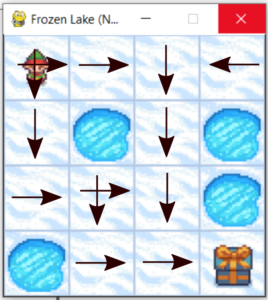